In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv("data/train.csv")

In [3]:
train.head()

,genre_id,ts_listen,media_id,album_id,context_type,release_date,platform_name,platform_family,media_duration,listen_type,user_gender,user_id,artist_id,user_age,is_listened
0,25471,1480597215,222606,41774,12,20040704,1,0,223,0,0,9241,55164,29,0
1,25571,1480544735,250467,43941,0,20060301,2,1,171,0,0,16547,55830,30,1
2,16,1479563953,305197,48078,1,20140714,2,1,149,1,1,7665,2704,29,1
3,7,1480152098,900502,71521,0,20001030,0,0,240,0,1,1580,938,30,0
4,7,1478368974,542335,71718,0,20080215,0,0,150,0,1,1812,2939,24,1


In [4]:
flow = train[(train["listen_type"] == 1)]

In [5]:
df_grouped = flow[["user_id", "listen_type", "is_listened"]].groupby("user_id").sum()

In [6]:
df_grouped["not_listened"] = df_grouped["listen_type"] - df_grouped["is_listened"]

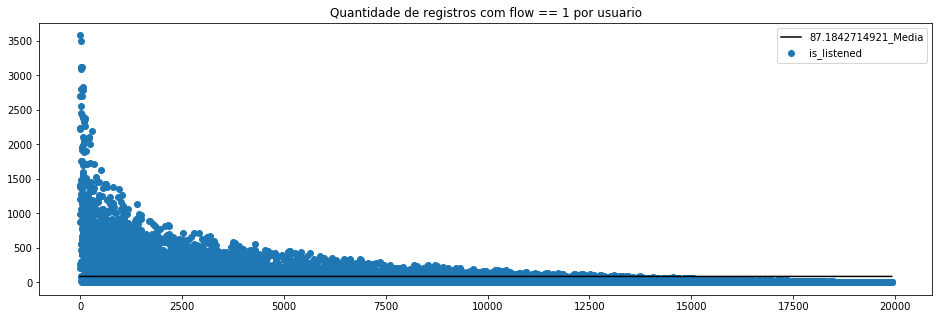

In [7]:
plt.figure(figsize=(16,5))
plt.scatter(df_grouped.index, df_grouped["is_listened"])
plt.plot(df_grouped.index, [df_grouped["is_listened"].mean()] * len(df_grouped), label="{}_Media".format(df_grouped["is_listened"].mean()), color="k")
plt.legend()
plt.title("Quantidade de registros com flow == 1 por usuario")
plt.show()

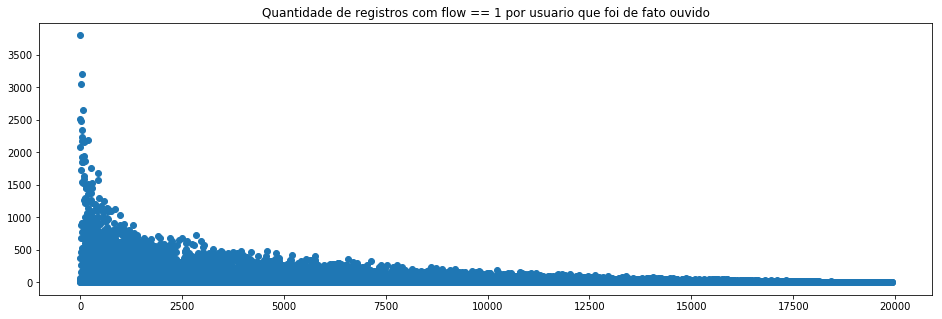

In [8]:
plt.figure(figsize=(16,5))
plt.scatter(df_grouped.index, df_grouped["not_listened"])
plt.title("Quantidade de registros com flow == 1 por usuario que foi de fato ouvido")
plt.show()

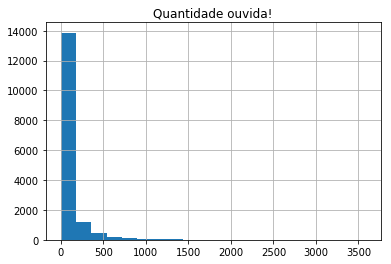

In [9]:
df_grouped["is_listened"].hist(bins=20)
plt.title("Quantidade ouvida!")
plt.show()

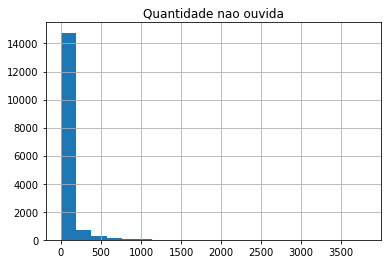

In [10]:
df_grouped["not_listened"].hist(bins=20)
plt.title("Quantidade nao ouvida")
plt.show()